In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [2]:
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
# ## Plotly
# import plotly.offline as py
# import plotly.graph_objs as go
# py.init_notebook_mode(connected=True)
# Others
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords

from sklearn.manifold import TSNE

/home/yelp_1/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
ids = pd.read_csv("scale_data/scaledata/Dennis+Schwartz/id.Dennis+Schwartz.txt", sep="[\r\n]+", header=None, names=["id"])
label_3class = pd.read_csv("scale_data/scaledata/Dennis+Schwartz/label.3class.Dennis+Schwartz.txt", sep="[\r\n]+", names=["3class_label"])
label_4class = pd.read_csv("scale_data/scaledata/Dennis+Schwartz/label.4class.Dennis+Schwartz.txt", sep="[\r\n]+",names=["4class_label"])
rating = pd.read_csv("scale_data/scaledata/Dennis+Schwartz/rating.Dennis+Schwartz.txt", sep="[\r\n]+",names=["rating"])
subj = pd.read_csv("scale_data/scaledata/Dennis+Schwartz/subj.Dennis+Schwartz.txt", sep="[\r\n]+",names=["subj_extraction"])

/home/yelp_1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/home/yelp_1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/home/yelp_1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  

In [4]:
dennis = pd.concat([ids,label_3class, label_4class, rating, subj], axis = 1)
dennis = dennis.sample(frac=1)

In [5]:
dennis.shape

(1027, 5)

In [6]:
y_d = dennis['3class_label']
dennis['n']=dennis.apply(lambda x:x["3class_label"]==0, axis=1)
dennis["neg"]=dennis.apply(lambda x:x["3class_label"]==1, axis=1)
dennis["pos"]=dennis.apply(lambda x:x["3class_label"]==2, axis=1)
y_d_encode = dennis[['n', 'neg', 'pos']]
x_d = list(dennis['subj_extraction'])

In [7]:
from sklearn.model_selection import train_test_split
xtrain_d, xvalid_d, ytrain_d, yvalid_d = train_test_split(list(dennis['subj_extraction']), y_d, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=False)

In [8]:
xtrain_d, xvalid_d, ytrain_d_encode, yvalid_d_encode = train_test_split(dennis['subj_extraction'], y_d_encode,  
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=False)

In [9]:
ids = pd.read_csv("scale_data/scaledata/James+Berardinelli/id.James+Berardinelli.txt", sep="[\r\n]+", header=None, names=["id"])
# label_3class = pd.read_csv("scale_data/scaledata/James+Berardinelli/label.3class.James+Berardinelli.txt", sep="[\r\n]+", names=["3class_label"])
label_3class = pd.read_csv("scale_data/scaledata/James+Berardinelli/label.3class.James+Berardinelli.txt", sep="[\r\n]+",names=["3class_label"])

label_4class = pd.read_csv("scale_data/scaledata/James+Berardinelli/label.4class.James+Berardinelli.txt", sep="[\r\n]+",names=["4class_label"])
rating = pd.read_csv("scale_data/scaledata/James+Berardinelli/rating.James+Berardinelli.txt", sep="[\r\n]+",names=["rating"])
subj = pd.read_csv("scale_data/scaledata/James+Berardinelli/subj.James+Berardinelli.txt", sep="[\r\n]+",names=["subj_extraction"])

/home/yelp_1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/home/yelp_1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/yelp_1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are inte

In [10]:
james = pd.concat([ids,label_3class, label_4class, rating, subj], axis = 1)
james = james.sample(frac=1)

In [11]:

james['n']=james.apply(lambda x:x["3class_label"]==0, axis=1)
james["neg"]=james.apply(lambda x:x["3class_label"]==1, axis=1)
james["pos"]=james.apply(lambda x:x["3class_label"]==2, axis=1)
y_j_encode = james[['n', 'neg', 'pos']]

In [12]:
x_j = james.subj_extraction.values
y_j = james['3class_label']

# glove_nn on the other writer

In [13]:
from sklearn.model_selection import train_test_split
xtrain_j, xvalid_j, ytrain_j, yvalid_j = train_test_split(x_j, y_j, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=False)

In [14]:
xtrain_j, xvalid_j, ytrain_j_encode, yvalid_j_encode = train_test_split(x_j, y_j_encode, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=False)

## the third writer

In [15]:
ids = pd.read_csv("scale_data/scaledata/Scott+Renshaw/id.Scott+Renshaw.txt", sep="[\r\n]+", header=None, names=["id"])
label_3class = pd.read_csv("scale_data/scaledata/Scott+Renshaw/label.3class.Scott+Renshaw.txt", sep="[\r\n]+", names=["3class_label"])
label_4class = pd.read_csv("scale_data/scaledata/Scott+Renshaw/label.4class.Scott+Renshaw.txt", sep="[\r\n]+",names=["4class_label"])
rating = pd.read_csv("scale_data/scaledata/Scott+Renshaw/rating.Scott+Renshaw.txt", sep="[\r\n]+",names=["rating"])
subj = pd.read_csv("scale_data/scaledata/Scott+Renshaw/subj.Scott+Renshaw.txt", sep="[\r\n]+",names=["subj_extraction"])

/home/yelp_1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/home/yelp_1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/home/yelp_1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  

In [16]:
scott = pd.concat([ids,label_3class, label_4class, rating, subj], axis = 1)
scott = scott.sample(frac=1)
# y_s is a column with 3 values: 0,1,2
y_s = scott['3class_label']
scott['n']=scott.apply(lambda x:x["3class_label"]==0, axis=1)
scott["neg"]=scott.apply(lambda x:x["3class_label"]==1, axis=1)
scott["pos"]=scott.apply(lambda x:x["3class_label"]==2, axis=1)
# y_s_encode are three columns with binary values for each column
y_s_encode = scott[['n', 'neg', 'pos']]
x_s = scott['subj_extraction']


## the fourth writer

In [17]:
ids = pd.read_csv("scale_data/scaledata/Steve+Rhodes/id.Steve+Rhodes.txt", sep="[\r\n]+", header=None, names=["id"])
label_3class = pd.read_csv("scale_data/scaledata/Steve+Rhodes/label.3class.Steve+Rhodes.txt", sep="[\r\n]+", names=["3class_label"])
label_4class = pd.read_csv("scale_data/scaledata/Steve+Rhodes/label.4class.Steve+Rhodes.txt", sep="[\r\n]+",names=["4class_label"])
rating = pd.read_csv("scale_data/scaledata/Steve+Rhodes/rating.Steve+Rhodes.txt", sep="[\r\n]+",names=["rating"])
subj = pd.read_csv("scale_data/scaledata/Steve+Rhodes/subj.Steve+Rhodes.txt", sep="[\r\n]+",names=["subj_extraction"])

/home/yelp_1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/home/yelp_1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/home/yelp_1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  

In [18]:
Rhodes = pd.concat([ids,label_3class, label_4class, rating, subj], axis = 1)
Rhodes = Rhodes.sample(frac=1)
# y_s is a column with 3 values: 0,1,2
y_r = Rhodes['3class_label']
Rhodes['n']=Rhodes.apply(lambda x:x["3class_label"]==0, axis=1)
Rhodes["neg"]=Rhodes.apply(lambda x:x["3class_label"]==1, axis=1)
Rhodes["pos"]=Rhodes.apply(lambda x:x["3class_label"]==2, axis=1)
# y_s_encode are three columns with binary values for each column
y_r_encode = Rhodes[['n', 'neg', 'pos']]
x_r = Rhodes['subj_extraction']

In [19]:
# total text
x_d = list(x_d)
x_j = list(x_j)
x_s = list(x_s)
x_r = list(x_r)
total_text = x_d+x_j+x_s+x_r

In [20]:
import glove_dl23 as gd

In [23]:
vocab_size, embedding_matrix, padded_docs = gd.get_glove_m(total_text)

In [24]:
padded_docs.shape

(5006, 3000)

In [25]:
embedding_matrix.shape

(46260, 100)

In [26]:
# Covert xtest and xtrain to padded doc
xvalid_d_padded = gd.padded_doc(xvalid_d)
xtrain_d_padded = gd.padded_doc(xtrain_d)

## cnn 

In [27]:
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Convolution1D, Embedding
from keras.layers.merge import Concatenate
from keras.models import Sequential, Model
def build_model(embedding_matrix, vocab_size):
    # define model
    embedding_dim = 50
    filter_sizes = (2, 4)
    num_filters = 10
    dropout_prob = (0.5, 0.8)
    hidden_dims = 50

    # Build model
    sequence_length = 3000
    input_shape = (sequence_length,)

    model_input = Input(shape=input_shape)

    # Static model does not have embedding layer

    z = Embedding(vocab_size, 100, input_length=sequence_length,weights=[embedding_matrix], name="embedding")(model_input)
    z.trainable = False
    
    z = Dropout(dropout_prob[0])(z)

    # Convolutional block
    conv_blocks = []
    for sz in filter_sizes:
        conv = Convolution1D(filters=num_filters,
                             kernel_size=sz,
                             padding="valid",
                             activation="relu",
                             strides=1)(z)
        conv = MaxPooling1D(pool_size=1)(conv)
        conv = Flatten()(conv)
        conv_blocks.append(conv)
    z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]

    z = Dropout(dropout_prob[1])(z)
    z = Dense(hidden_dims, activation="relu")(z)
    model_output = Dense(3, activation="sigmoid")(z)

    model = Model(model_input, model_output)
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    weights = np.array([v for v in embedding_matrix])
    print("Initializing embedding layer with glove weights, shape", weights.shape)
    embedding_layer = model.get_layer("embedding")
    embedding_layer.set_weights([weights])
    return model

In [28]:
model_d = build_model(embedding_matrix, vocab_size)
history = model_d.fit(xtrain_d_padded, ytrain_d_encode, validation_data = (xvalid_d_padded, yvalid_d_encode), shuffle = False, epochs=50, verbose=1)

Initializing embedding layer with glove weights, shape (46260, 100)
Train on 821 samples, validate on 206 samples
Epoch 1/50
821/821 [==============================] - 15s 18ms/step - loss: 1.1207 - acc: 0.3678 - val_loss: 1.0938 - val_acc: 0.4126
Epoch 2/50
821/821 [==============================] - 13s 15ms/step - loss: 1.0950 - acc: 0.4166 - val_loss: 1.0776 - val_acc: 0.3883
Epoch 3/50
821/821 [==============================] - 13s 15ms/step - loss: 1.0735 - acc: 0.4153 - val_loss: 1.0685 - val_acc: 0.3883
Epoch 4/50
821/821 [==============================] - 14s 17ms/step - loss: 1.0613 - acc: 0.4202 - val_loss: 1.0660 - val_acc: 0.4272
Epoch 5/50
821/821 [==============================] - 14s 16ms/step - loss: 1.0637 - acc: 0.4214 - val_loss: 1.0681 - val_acc: 0.3738
Epoch 6/50
821/821 [==============================] - 13s 16ms/step - loss: 1.0525 - acc: 0.4373 - val_loss: 1.0648 - val_acc: 0.3786
Epoch 7/50
821/821 [==============================] - 13s 15ms/step - loss: 1.0391

In [31]:
import matplotlib.pyplot as plt

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


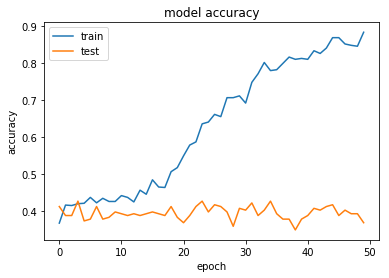

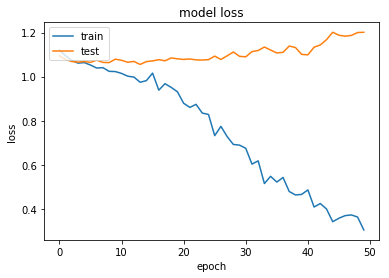

In [32]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## visuliaze the prediction

In [128]:
model.evaluate(xvalid_d_padded_docs, yvalid_d_encode, verbose=1)

206/206 [==============================] - 0s 574us/step


[1.113010972448923, 0.40291262193790917]

In [76]:
yvalid_d_encode

,n,neg,pos
821,False,False,True
822,False,False,True
823,False,False,True
824,False,False,True
825,False,False,True
826,False,False,True
827,False,False,True
828,False,False,True
829,False,False,True
830,False,False,True


In [27]:
xtrain_d_glv = np.array(xtrain_d_glv)
xvalid_d_glv = np.array(xvalid_d_glv)
xtrain_d_glv.shape

(924, 300)

In [18]:
# serialize model to JSON
model_json = model.to_json()
with open("model_gl.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_gl.h5")
print("Saved model to disk")

Saved model to disk


In [81]:
# serialize model to JSON
model_cnn_json = model.to_json()
with open("model_gl_cnn.json", "w") as json_file:
    json_file.write(model_cnn_json)
# serialize weights to HDF5
model.save_weights("model_gl_cnn.h5")
print("Saved model to disk")

Saved model to disk


In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os

In [52]:
xvalid_j_padded = gd.padded_doc(xvalid_j)
xvalid_j_padded.shape
xtrain_j_padded = gd.padded_doc(xtrain_j)
xtrain_j_padded.shape
# xtrain_j_padded = xtrain_j_padded[:924,:]
# yvalid_j_encode.shape

(1176, 100)

## load the pre_trained model and evaluate on james directly

In [82]:

# load json and create model
json_file = open('model_gl_cnn.json', 'r')
loaded_model_cnn_json = json_file.read()
json_file.close()
loaded_model_cnn = model_from_json(loaded_model_cnn_json)
# load weights into new model
loaded_model_cnn.load_weights("model_gl_cnn.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model_cnn.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model_cnn.evaluate(xvalid_j_padded, yvalid_j_encode, verbose=1)
print("%s: %.2f%%" % (loaded_model_cnn.metrics_names[1], score[1]*100))
# loaded_model.summary()


Loaded model from disk
131/131 [==============================] - 1s 4ms/step
acc: 39.44%


In [57]:
total_text = x_d+x_j 

In [58]:
vocab_size, embedding_matrix, padded_docs = gd.get_glove_m(total_text)


In [59]:
embedding_matrix.shape

(33501, 100)

In [ ]:
model.load

## fine tuning freeze the E layer.

In [89]:
for layer in loaded_model_cnn.layers[:2]:
    layer.trainable = False

In [84]:
loaded_model_cnn

In [85]:
from keras import optimizers

loaded_model_cnn.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [86]:
model.fit(xtrain_j_padded, ytrain_j_encode, epochs = 10, verbose = 1)

Epoch 1/10
1176/1176 [==============================] - 4s 4ms/step - loss: 0.8200 - acc: 0.3104
Epoch 2/10
1176/1176 [==============================] - 3s 3ms/step - loss: 0.7752 - acc: 0.4337
Epoch 3/10
1176/1176 [==============================] - 3s 3ms/step - loss: 0.7654 - acc: 0.4515
Epoch 4/10
1176/1176 [==============================] - 3s 3ms/step - loss: 0.7507 - acc: 0.4541
Epoch 5/10
1176/1176 [==============================] - 4s 3ms/step - loss: 0.7538 - acc: 0.4549
Epoch 6/10
1176/1176 [==============================] - 3s 3ms/step - loss: 0.7358 - acc: 0.4575
Epoch 7/10
1176/1176 [==============================] - 3s 3ms/step - loss: 0.7264 - acc: 0.4549
Epoch 8/10
1176/1176 [==============================] - 4s 3ms/step - loss: 0.7252 - acc: 0.4541A: 0s - loss: 0.7286 - acc:
Epoch 9/10
1176/1176 [==============================] - 3s 3ms/step - loss: 0.7224 - acc: 0.4558
Epoch 10/10
1176/1176 [==============================] - 4s 3ms/step - loss: 0.7030 - acc: 0.4566


In [90]:
loaded_model_cnn.fit(xtrain_j_padded, ytrain_j_encode, epochs=10, verbose=1)

Epoch 1/10
  64/1176 [>.............................] - ETA: 2s - loss: 0.7982 - acc: 0.5104

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/engine/training.py:953: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1176/1176 [==============================] - 2s 2ms/step - loss: 0.7868 - acc: 0.5105
Epoch 2/10
1176/1176 [==============================] - 2s 2ms/step - loss: 0.7680 - acc: 0.5162
Epoch 3/10
1176/1176 [==============================] - 2s 2ms/step - loss: 0.7587 - acc: 0.5156
Epoch 4/10
1176/1176 [==============================] - 2s 2ms/step - loss: 0.7346 - acc: 0.5334
Epoch 5/10
1176/1176 [==============================] - 2s 2ms/step - loss: 0.7385 - acc: 0.5357
Epoch 6/10
1176/1176 [==============================] - 2s 2ms/step - loss: 0.7319 - acc: 0.5266
Epoch 7/10
1176/1176 [==============================] - 2s 2ms/step - loss: 0.7068 - acc: 0.5468
Epoch 8/10
1176/1176 [==============================] - 2s 2ms/step - loss: 0.7124 - acc: 0.5454
Epoch 9/10
1176/1176 [==============================] - 2s 2ms/step - loss: 0.7007 - acc: 0.5496
Epoch 10/10
1176/1176 [==============================] - 2s 2ms/step - loss: 0.6894 - acc: 0.5683


## Train the model from the first writer

In [108]:
pretrainModel_cnn = build_model(embedding_matrix, vocab_size)

Initializing embedding layer with glove weights, shape (41441, 100)
